In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sparse_shift.plotting import plot_dag
from collections import defaultdict

In [4]:
df = pd.read_csv('./bivariate_icp_pvalues.csv', header=[0, 1], delimiter=', ', engine='python')

In [5]:
df

Params                                                 \
    params_index nonlinearity noise_df intervention combination   
0              0         sqrt      100         soft    additive   
1              0         sqrt      100         soft    additive   
2              0         sqrt      100         soft    additive   
3              0         sqrt      100         soft    additive   
4              0         sqrt      100         soft    additive   
..           ...          ...      ...          ...         ...   
315            1         sqrt      100         soft    additive   
316            1         sqrt      100         soft    additive   
317            1         sqrt      100         soft    additive   
318            1         sqrt      100         soft    additive   
319            1         sqrt      100         soft    additive   

                                                            \
    intervention_shift intervention_scale pre_intervention   
0                    2                  0            False   
1                    2                  0            False   
2                    2                  0            False   
3                    2                  0            False   
4                    2                  0            False   
..                 ...                ...              ...   
315                  2                  0            False   
316                  2                  0            False   
317                  2                  0            False   
318                  2                  0            False   
319                  2                  0            False   

                                           XY            YX         
    intervention_targets n_samples rep     X1     X2     X1     X2  
0               [None,0]        50   0  0.010  0.018  0.000  0.693  
1               [None,0]        50   1  0.010  0.025  0.000  0.693  
2               [None,0]        50   2  0.010  0.003  0.000  0.762  
3               [None,0]        50   3  0.010  0.225  0.000  0.733  
4               [None,0]        50   4  0.030  0.003  0.000  0.396  
..                   ...       ...  ..    ...    ...    ...    ...  
315             [None,1]       300  35  0.366  0.000  0.187  0.010  
316             [None,1]       300  36  0.653  0.000  1.000  0.010  
317             [None,1]       300  37  0.564  0.000  0.540  0.010  
318             [None,1]       300  38  0.119  0.000  0.917  0.010  
319             [None,1]       300  39  0.366  0.000  0.747  0.010  

[320 rows x 15 columns]

In [7]:
gb = df['Params'].groupby([
    'nonlinearity',
    'noise_df',
    'intervention',
    'combination',
    'intervention_shift',
    'intervention_scale',
])

In [8]:
list(gb.groups.values())

[Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             310, 311, 312, 313, 314, 315, 316, 317, 318, 319],
            dtype='int64', length=320)]

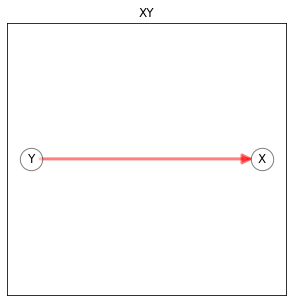

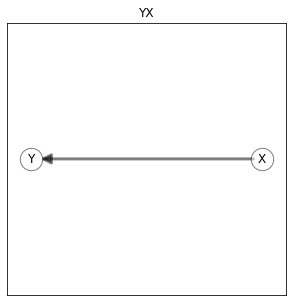

In [9]:
dag_dict = {
    'XY': np.asarray([[0, 1], [0, 0]]),
    'YX': np.asarray([[0, 0], [1, 0]])
}

true_parents = dag_dict['YX']

for key, dag in dag_dict.items():
    plot_dag(
        dag,
        highlight_edges=dag-true_parents,
        labels=['X', 'Y'],
        title=key)

In [ ]:
gb = df['Params'].groupby([
    'nonlinearity',
    'noise_df',
    'intervention',
    'combination',
    'intervention_shift',
    'intervention_scale',
])



for sim_keys, sim_idx in gb.groups.items():
    

In [235]:
df = pd.read_csv('./bivariate_icp_pvalues.csv', header=[0, 1], delimiter=', ', engine='python')

n_features = 2
alpha = 0.05 / n_features

n_samples_list = df['Params']['n_samples'].unique()
change_counts = {
    params_key: {
        dag_key : []
        for dag_key in dag_dict.keys()
    }
    for params_key in df['Params']['params_index'].unique()
}

for params_index in df['Params']['params_index'].unique():
    sub_df = df[df['Params']['params_index'] == params_index]
    targets = sub_df['Params', 'intervention_targets'].iloc[0]
    print('Params index: ', params_index,' Targets: ', targets)
    
    for i, n_samples in enumerate(n_samples_list):
        idx = sub_df[sub_df['Params']['n_samples'] == n_samples].index
        for dag_key in dag_dict.keys():
            if n_samples == max(n_samples_list):
                print(dag_key)
                print(sub_df.loc[idx][dag_key].to_numpy())
            change_counts[params_index][dag_key].append(np.sum(
                sub_df.loc[idx][dag_key].to_numpy() < alpha, axis=1
            ))

Params index:  0  Targets:  [None,0]
XY
[[0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]
 [0.01 0.  ]]
YX
[[0.    0.782]
 [0.    0.99 ]
 [0.    0.079]
 [0.    0.921]
 [0.    0.158]
 [0.    0.584]
 [0.    0.525]
 [0.    0.842]
 [0.    0.554]
 [0.    0.554]
 [0.    0.663]
 [0.    0.05 ]
 [0.    0.693]
 [0.    0.921]
 [0.    0.129]
 [0.    0.277]
 [0.    0.455]
 [0.    0.98 ]
 [0.    0.594]
 [0.    0.149]
 [0.    0.495]
 [0.    0.535]
 [0.    0.941]
 [0.    0.891]
 [0.    0.713]
 [0.    0.881]
 [0.    0.911]
 [0.    0.832]
 [0.    0.406]
 

In [236]:
change_counts

{0: {'XY': [array([2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2,
          2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2]),
   array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]),
   array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
   array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])],
  'YX': [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
   array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
   array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

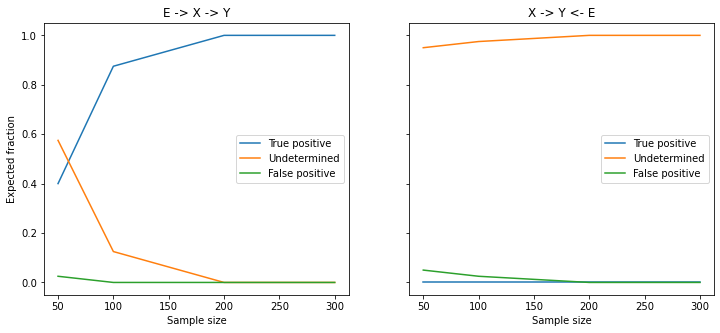

In [232]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

for col, target in enumerate(change_counts.keys()):
    ax = axes[col]
    
    count_diffs = np.asarray(change_counts[target]['XY']) - np.asarray(change_counts[target]['YX'])
    ax.plot(
        n_samples_list,
        [np.mean(cds > 0) for cds in count_diffs],
        label='True positive'
    )
    
    ax.plot(
        n_samples_list,
        [np.mean(cds == 0) for cds in count_diffs],
        label='Undetermined'
    )
    
    ax.plot(
        n_samples_list,
        [np.mean(cds < 0) for cds in count_diffs],
        label='False positive'
    )
    
    if target == 0:
        ax.set_title('E -> X -> Y')  
    elif target == 1:
        ax.set_title('X -> Y <- E') 
    ax.set_xlabel('Sample size')
    ax.legend()
axes[0].set_ylabel('Expected fraction')
plt.show()

In [10]:
dag2mech = {
    'XY': {
        'X1': 'PA=(X2)',
        'X2': 'PA=()'
    },
    'YX': {
        'X1': 'PA=()',
        'X2': 'PA=(X1)'
    }
}

In [11]:
alpha = 0.05
dfs = []
for dag_key in dag2mech.keys():
    for variable, mech in dag2mech[dag_key].items():
        power_df = df['Params']
        power_df.loc[:, 'variable'] = variable
        power_df.loc[:, 'mechanism'] = mech
        power_df.loc[:, 'test_power'] = (df[dag_key][variable] <= alpha).astype(int)
        dfs.append(power_df)
        
power_df = pd.concat(dfs, axis=0)

/Users/rflperry/opt/miniconda3/envs/kcd/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


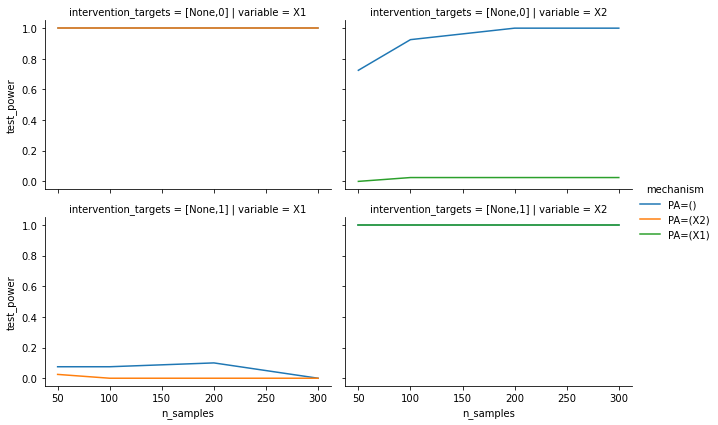

In [14]:
sns.relplot(
    data=power_df.groupby(
        ['intervention_targets', 'n_samples', 'variable', 'mechanism']
    ).mean().reset_index(),
    x='n_samples',
    y='test_power',
    col='variable',
    row='intervention_targets',
    hue='mechanism',
    kind='line',
    height=3, aspect=1.5,
    legend='full',
)
plt.show()